# Machine Learning for Additive Manufacturing

Load in relevant modules


python package dependencies: ```mendeleev, matplotlib, pandas, numpy, pylab, pprint, sklearn, scipy, os```



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from pprint import pprint
from pylab import * # For adjusting frame width only

os.getcwd()

'/media/cmu/DATA1/francis/Previous Projects/AdditiveNet/CNN_AM_Project/AdditiveNet'

In [2]:
from sklearn.preprocessing import StandardScaler
from plotting_utils import frame_tick
%matplotlib inline

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Load in data, perform basic analysis

In [4]:
# Load in the csv data, download from Google Sheets and store in directory
print("Current directory: ", os.getcwd())
csv = pd.read_csv('meltpoolgeometry.csv') 
csv1 = pd.read_csv('meltpoolgeometry.csv')
csv2 = pd.read_csv('meltpoolclassification.csv')
regressioncsv =  csv1
class_csv = csv1.append(csv2)
materials = csv['Material'].value_counts()


Current directory:  /media/cmu/DATA1/francis/Previous Projects/AdditiveNet/CNN_AM_Project/AdditiveNet


In [5]:
print('Keys Present in CSV:')
for key in csv.keys():
    print(key)

Keys Present in CSV:
Material
Process
Sub-process
Power
Velocity
Hatch spacing
depth of meltpool
width of melt pool
length of melt pool
d/l
d/w
l/w
E (J/mm)
E (J/mm3)
layer thickness
beam D
absorption coefficient
absorption coefficient 2
density
Cp
k
melting T
minimal absorptivity
meltpool shape
spatter
Y (wt%)
Zn (wt%)
Mg (wt%)
Si (wt%)
Al (wt%)
Sn (wt%)
Zr (wt%)
W (wt%)
Ti (wt%)
V (wt%)
Co (wt%)
Cu (wt%)
Ta (wt%)
Nb (wt%)
Ni  (wt.%)
Cr  (wt.%)
Fe (wt.%)
Mn (wt%)
Mo (wt.%)
D10
D50
D90
paper ID
paper
porosity
relative density
comment
Unnamed: 52


In [6]:
def print_field_composition(csv_input, field):
    print(color.BOLD + field + color.END) 
    unique, counts = np.unique(csv_input[field], return_counts = True)
    indices = np.argsort(counts)[::-1]
    unique_sorted = unique[indices]
    counts_sorted = counts[indices]
    for i in range(len(unique_sorted)):
        print(f'{counts_sorted[i]} entries present in {field} {unique_sorted[i]}')
print_field_composition(csv, 'Material')


Material
639 entries present in Material SS316L
452 entries present in Material Ti-6Al-4V
147 entries present in Material IN718
103 entries present in Material SS17-4PH
97 entries present in Material IN625
50 entries present in Material IN738LC
41 entries present in Material Hastelloy X
35 entries present in Material Cu10Sn
29 entries present in Material AlSi10Mg
25 entries present in Material Al-2.5Fe
24 entries present in Material Al-C-Co-Fe-Mn-Ni
24 entries present in Material Tungsten
20 entries present in Material Ti-49Al-2Cr-2Nb
19 entries present in Material HCP Cu
18 entries present in Material Invar36
16 entries present in Material SS304
12 entries present in Material WE43
12 entries present in Material MS1-
9 entries present in Material CMSX-4
8 entries present in Material TiC/Inconel 718
6 entries present in Material SS304L
6 entries present in Material Ti6242
5 entries present in Material K403 superalloy
4 entries present in Material Ti-45Al
3 entries present in Material 41

In [7]:
field = 'Material'
print(color.BOLD + field + color.END) 
unique, counts = np.unique(csv[field], return_counts = True)
indices = np.argsort(counts)[::-1]
unique_sorted = unique[indices]
counts_sorted = counts[indices]
for i in range(len(unique_sorted)):
    print(f'{counts_sorted[i]} entries present in {field} {unique_sorted[i]}')


Material
639 entries present in Material SS316L
452 entries present in Material Ti-6Al-4V
147 entries present in Material IN718
103 entries present in Material SS17-4PH
97 entries present in Material IN625
50 entries present in Material IN738LC
41 entries present in Material Hastelloy X
35 entries present in Material Cu10Sn
29 entries present in Material AlSi10Mg
25 entries present in Material Al-2.5Fe
24 entries present in Material Al-C-Co-Fe-Mn-Ni
24 entries present in Material Tungsten
20 entries present in Material Ti-49Al-2Cr-2Nb
19 entries present in Material HCP Cu
18 entries present in Material Invar36
16 entries present in Material SS304
12 entries present in Material WE43
12 entries present in Material MS1-
9 entries present in Material CMSX-4
8 entries present in Material TiC/Inconel 718
6 entries present in Material SS304L
6 entries present in Material Ti6242
5 entries present in Material K403 superalloy
4 entries present in Material Ti-45Al
3 entries present in Material 41

In [8]:
field = 'paper ID'
print(color.BOLD + field + color.END) 
unique, counts = np.unique(csv[field], return_counts = True)
indices = np.argsort(counts)[::-1]
unique_sorted = unique[indices]
counts_sorted = counts[indices]
for i in range(len(unique_sorted)):
    print(f'{counts_sorted[i]} entries present in {field} {unique_sorted[i]}')


paper ID
121 entries present in paper ID 73
121 entries present in paper ID 80
108 entries present in paper ID Runbo data
94 entries present in paper ID 58
75 entries present in paper ID 19
70 entries present in paper ID 34
70 entries present in paper ID 25
64 entries present in paper ID 13
61 entries present in paper ID 49
49 entries present in paper ID 15
48 entries present in paper ID 20
45 entries present in paper ID 6
36 entries present in paper ID 56
36 entries present in paper ID 8
35 entries present in paper ID 72
30 entries present in paper ID 67
29 entries present in paper ID 47
28 entries present in paper ID 57
26 entries present in paper ID 71
25 entries present in paper ID 37
25 entries present in paper ID 30
25 entries present in paper ID 41
24 entries present in paper ID 64
24 entries present in paper ID 28
24 entries present in paper ID 60
23 entries present in paper ID 9
20 entries present in paper ID 63
20 entries present in paper ID 70
20 entries present in paper ID 

In [9]:
# Examine distribution of features
for col in csv.columns:
    values = csv[col]
    num_present = len([value for value in values if not pd.isnull(value)])
    total = len(values)
    parameter = col
    print('{:.1f} % samples have '.format(100*num_present/total) + parameter + ' value')

100.0 % samples have Material value
100.0 % samples have Process value
100.0 % samples have Sub-process value
100.0 % samples have Power value
100.0 % samples have Velocity value
23.7 % samples have Hatch spacing value
80.5 % samples have depth of meltpool value
63.6 % samples have width of melt pool value
17.5 % samples have length of melt pool value
64.2 % samples have d/l value
49.7 % samples have d/w value
35.1 % samples have l/w value
94.0 % samples have E (J/mm) value
20.4 % samples have E (J/mm3) value
79.7 % samples have layer thickness value
81.9 % samples have beam D value
59.5 % samples have absorption coefficient value
63.1 % samples have absorption coefficient 2 value
97.3 % samples have density value
97.3 % samples have Cp value
97.1 % samples have k value
100.0 % samples have melting T value
72.5 % samples have minimal absorptivity value
43.9 % samples have meltpool shape value
0.5 % samples have spatter value
100.0 % samples have Y (wt%) value
100.0 % samples have Zn (w

# Machine Learning

## Helper functions for selecting data

In [35]:
from classification_ml import classify_learn
from utils import select_subset, select_material, select_process
from utils import select_parameters, extract_features

In [34]:
import importlib
import classification_ml
importlib.reload(classification_ml)


<module 'classification_ml' from '/media/cmu/DATA1/francis/Previous Projects/AdditiveNet/CNN_AM_Project/AdditiveNet/classification_ml.py'>

In [11]:
# Example use case
new_csv = select_subset(class_csv, 'Sub-process','SLM')
parameter_list = ['Power', 'Velocity', 'layer thickness']
label_col = 'meltpool shape'
X, y = select_parameters(new_csv, parameter_list, label_col)


In [12]:
from train_ml import learn

## Regression Task

Predicts the melt pool depth based on features of the build process, iterating over the algorithms:


- Random Forests 'RF'


- Gaussian Process Regression 'GPR'


- Support Vector Regression 'SVR'


- Ridge Linear Regression 'Ridge'


- Lasso Linear Regression  'Lasso'


- Gradient Boosted Random Forest 'GB'



- Neural Network 'NN'

Base ML case considers process and thermodynamic parameters, and later cells add one-hot-encoding and elemental features


In [36]:
def draw_regression_process_map(csv_subset, label_column, dpi  = 300, model_name  = 'RF'):
    
    parameter_list = ['Power', 'Velocity']
    
    data_list = []
    label_list = []
    for i in range(len(csv_subset)):
        success, features, label = extract_features(new_csv.iloc[i], parameter_list, label_column)
        if success < 0:
            continue
        else:
            data_list.append(features)
            label_list.append(label)
    X = np.array(np.squeeze(data_list))
    y = np.array(label_list)
    
    print(f'Using: {model_name}')
    fit_models, train_accuracy, train_accuracy_std, test_accuracy, test_accuracy_std  = learn(X.reshape(-1, len(parameter_list)), y, parameters = parameter_list, title = 'SLM', model_name = model_name)
        
    scaler = StandardScaler()
    scaler.fit(X)
    X_rescale = scaler.transform(X)
    mean = np.mean(y)
    std = np.std(y)
    ynorm = (y - mean)/std
    nx = 300
    ny = 300

    xs = np.linspace(1.1*np.min(X_rescale[:,0]), 1.1*np.max(X_rescale[:,0]), nx)
    ys = np.linspace(1.1*np.min(X_rescale[:,1]), 1.1*np.max(X_rescale[:,1]), ny)

    xx, yy = np.meshgrid(xs, ys)
    for idx,model in enumerate(fit_models):
        print(dpi)
        fig = plt.figure(figsize = [4,3], dpi = dpi)
    
        xx, yy = np.meshgrid(xs, ys)
        W = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
        xx_unscaled = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
        xx = xx_unscaled[:,0].reshape(xx.shape)
        yy = xx_unscaled[:, 1].reshape(yy.shape)

        #Z = np.argmax(W, axis = 1)
        Z = W
        
        Z = Z.reshape(xx.shape)
        ax = plt.subplot(111)
        plt.pcolormesh(xx, yy, (Z*std+mean), cmap = 'jet')

        
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('Melt Pool Depth', rotation = 270, labelpad = 10)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        plt.title(model_name + ', Ti-6Al-4V' + ', LPBF')
        
        plt.xticks(fontsize = 8)
        plt.yticks(fontsize = 8)
        frame_tick()
        plt.ylabel(r'Velocity ([mm/s])')
        plt.xlabel(r'Power')
        plt.tight_layout()
        plt.scatter(X[:,0], X[:, 1], c = y, edgecolor = 'k', cmap = 'jet')
        plt.tight_layout()
        plt.show()

Using: RF
RF  Train R^2: 0.84866 ± 0.00983, Test R^2: 0.53097 ± 0.05475
300


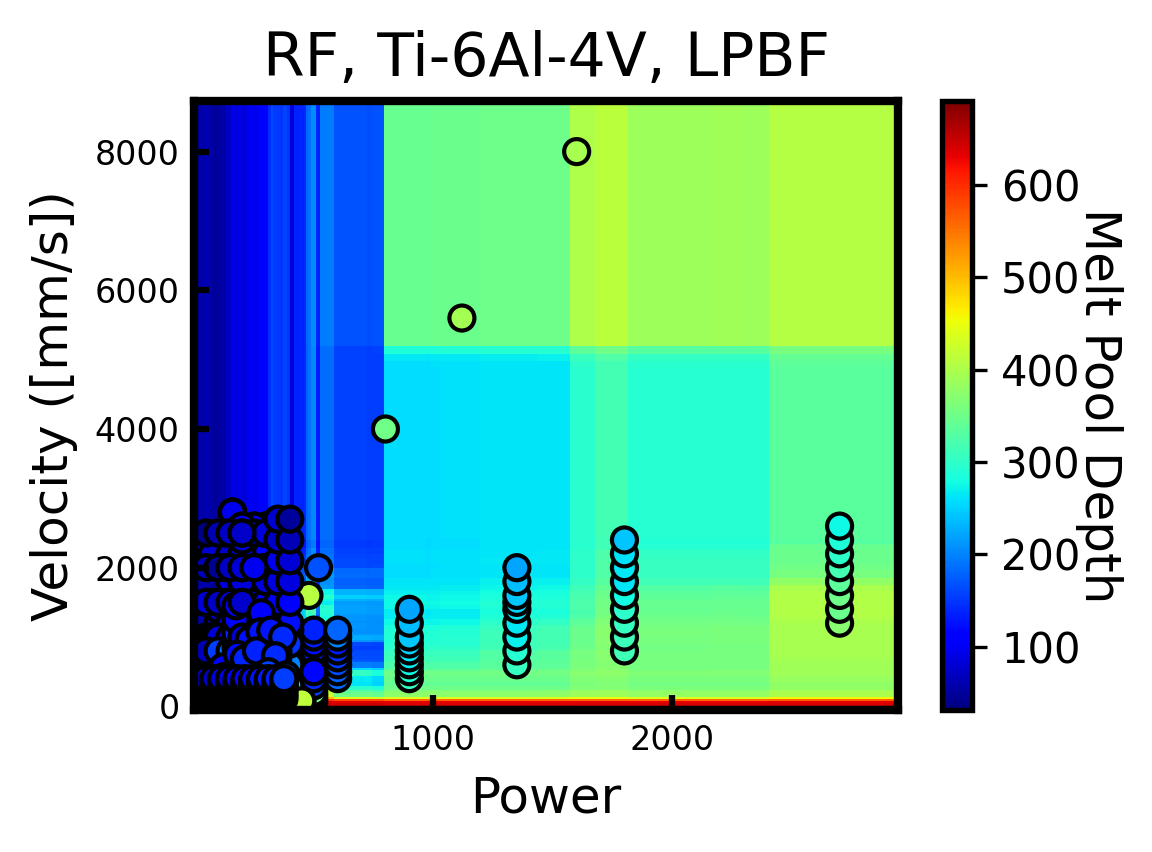

In [25]:
draw_regression_process_map(new_csv, dpi = 300, model_name = 'RF', label_column = 'width of melt pool')

## Classification task 

Predicts the melt pool shape based on features of the build process. The potential classes are `spatter`, `balling`, `keyhole`, `desirable`, and `LOF`  describing either the type of defect, or indicating that there is  no defect in the `desirable` case. The following algorithms are used to generate predictions, and their accuracies are compared.


- Random Forests 'RF'


- Gaussian Process Classification 'GPC'


- Support Vector Classification 'SVC'


- Logistic Regression 'Logistic Regression'


- Gradient Boosted Random Forest 'GB'



- Neural Network 'NN'

The base ML case considers process and thermodynamic parameters, and later cells add one-hot-encoding and elemental features


## Classification Decision Boundaries based on Power and Velocity

In [50]:
def draw_classification_process_map(csv_subset, label_column, dpi  = 300, model_name  = 'RF'):
    
    parameter_list = ['Power', 'Velocity']
    data_list = []
    label_list = []
    new_csv = select_subset(class_csv, 'Sub-process', 'SLM')
    new_csv = select_material(new_csv, 'Ti-6Al-4V')
    for i in range(len(new_csv)):
        success, features, label = extract_features(new_csv.iloc[i], parameter_list, label_col)
        if success < 0 or not label in ['keyhole', 'LOF', 'desirable'] :
            continue
        else:
            data_list.append(features)
            label_list.append(label)


    X= np.array(np.squeeze(data_list))
    y = np.array(label_list)
    labels = np.unique(y)
    label_id = np.arange(len(labels))

    class_labels = np.zeros(len(y))
    for idx, sample in enumerate(y):
        for l_id, lbl in enumerate(labels):
            if lbl == sample:
                class_labels[idx] = l_id

                
   
    class_labels = np.array(class_labels,dtype = 'int')


    fit_models, train_accuracy, train_accuracy_std, test_accuracy, test_accuracy_std = classify_learn(X.reshape(-1, len(X[0])), 
                                                                                                    class_labels,
                                                                                                    label_names = label_id, 
                                                                                                    prefix= 'decbound', 
                                                                                                    parameters = parameter_list, 
                                                                                                    title = 'SLM', 
                                                                                                    plot = False, 
                                                                                                    model_name = model_name)
    # fit_models will be a list with one trained model
    model = fit_models[0]
    scaler = StandardScaler()
    scaler.fit(X)
    X_rescale = scaler.transform(X)

    nx = 300
    ny = 300

    xs = np.linspace(1.1*np.min(X_rescale[:,0]), 1.1*np.max(X_rescale[:,0]), nx)

    ys = np.linspace(1.1*np.min(X_rescale[:,1]), 1.1*np.max(X_rescale[:,1]), ny)

    xx, yy = np.meshgrid(xs, ys)
        


    fig = plt.figure(figsize = [4,3], dpi = dpi)

    xx, yy = np.meshgrid(xs, ys)
    W = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    xx_unscaled = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    xx = xx_unscaled[:,0].reshape(xx.shape)
    yy = xx_unscaled[:, 1].reshape(yy.shape)

    Z = W
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(111)
    cmap = plt.get_cmap('viridis', len(np.unique(class_labels)))

    plt.pcolormesh(xx, yy, (Z), cmap = cmap)
    cbar = plt.colorbar()
    plt.clim(np.min(np.unique(class_labels)) - 0.5, np.max(np.unique(class_labels)) +0.5)
    strings= labels
    cbar.set_ticks(np.arange(len(np.unique(class_labels))))
    cbar.set_ticklabels(strings)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    plt.title(f'{model_name}' + ', Ti-6Al-4V' + ', LPBF')
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    frame_tick()
    plt.xlabel(r'Velocity (mm/s)')
    plt.ylabel(r'Power')
    plt.tight_layout()

    plt.scatter(X[:,0], X[:, 1], c = class_labels, edgecolor = 'k', cmap= cmap)
    plt.tight_layout()
    plt.show()
    plt.clf()

RandomForestClassifier()
RandomForestClassifier()
RandomForestClassifier()
RandomForestClassifier()
RandomForestClassifier()
RF Train Accuracy: 0.98822 ± 0.00641, Test Accuracy: 0.75371 ± 0.04966


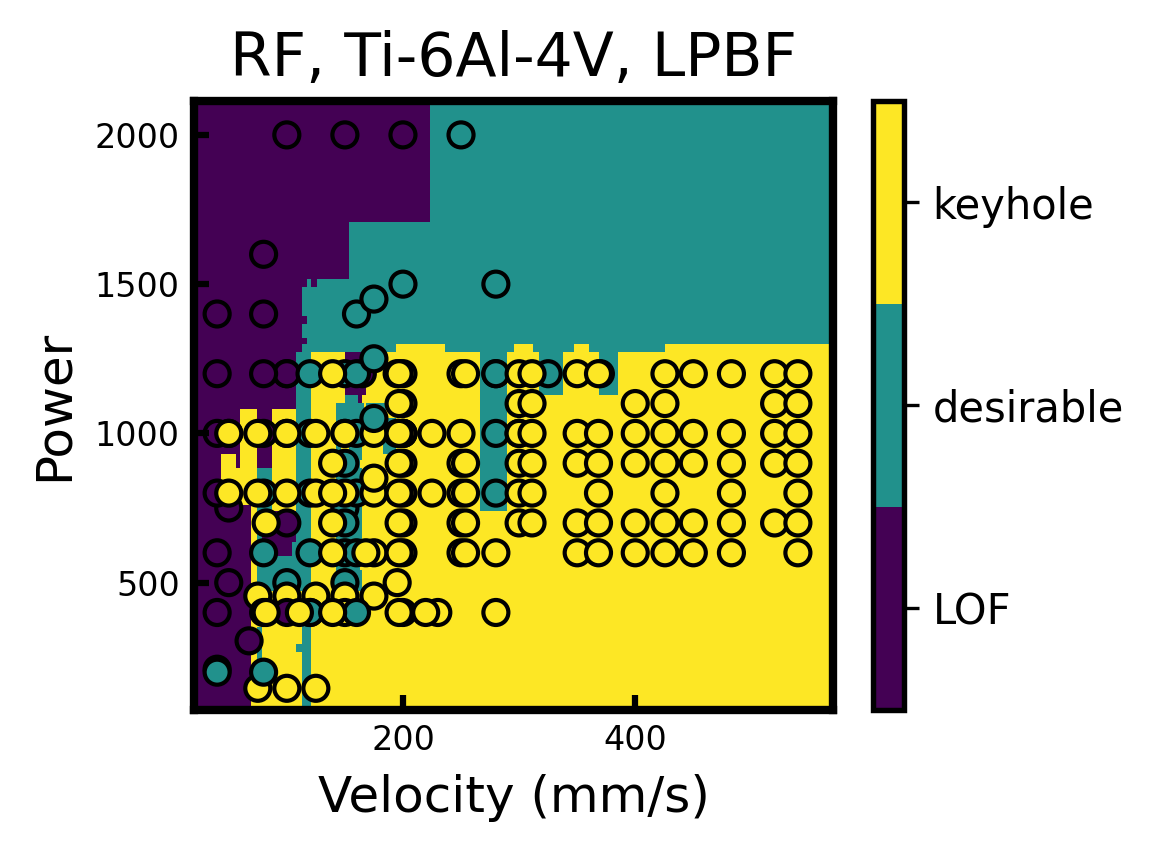

<Figure size 432x288 with 0 Axes>

In [53]:
# Define parameters that models will be trained on and value to be predicted
parameter_list = ['Velocity', 'Power']#['Power', 'Velocity', 'Hatch spacing', 'width of melt pool']
label_col = 'meltpool shape'


#new_csv = select_subset(new_csv, 'paper ID', 19)
#new_csv = select_material(new_csv, 'Ti6Al4V')

#Form dataset array from dataframe, given parameter_list, label_col
# function select_parameters() does this as well
data_list = []
label_list = []
new_csv = select_subset(class_csv, 'Sub-process', 'SLM')
new_csv = select_material(new_csv, 'Ti-6Al-4V')

draw_classification_process_map(new_csv, dpi = 300, model_name = 'RF', label_column = 'meltpool shape')